In [72]:
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sb                    
import numpy as np                        

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [73]:
dados = pd.read_csv("card_transdata.csv", sep=",")

In [74]:
dados.shape

(1000000, 8)

In [75]:
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [76]:
set(dados['fraud'])

{0.0, 1.0}

In [77]:
dados.isnull().sum() 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [78]:
#Separando os dados
x = dados.drop(columns=['fraud'])
y = dados['fraud'] 

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) 

In [80]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth = 2)

In [81]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [82]:
y_predito = dt.predict(x_test) 

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.428\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.25, 0.5, 'x[0] <= 100.004\nentropy = 0.169\nsamples = 717444\nvalue = [699473, 17971]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.052\nsamples = 681683\nvalue = [677647, 4036]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.965\nsamples = 35761\nvalue = [21826, 13935]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.951\nsamples = 82556\nvalue = [30605.0, 51951.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.541\nsamples = 29007\nvalue = [25406, 3601]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.46\nsamples = 53549\nvalue = [5199, 48350]')]

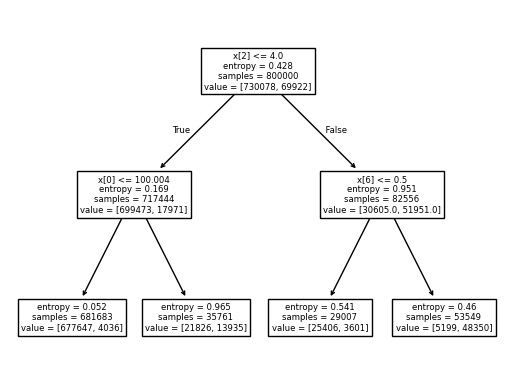

In [83]:
tree.plot_tree(dt)

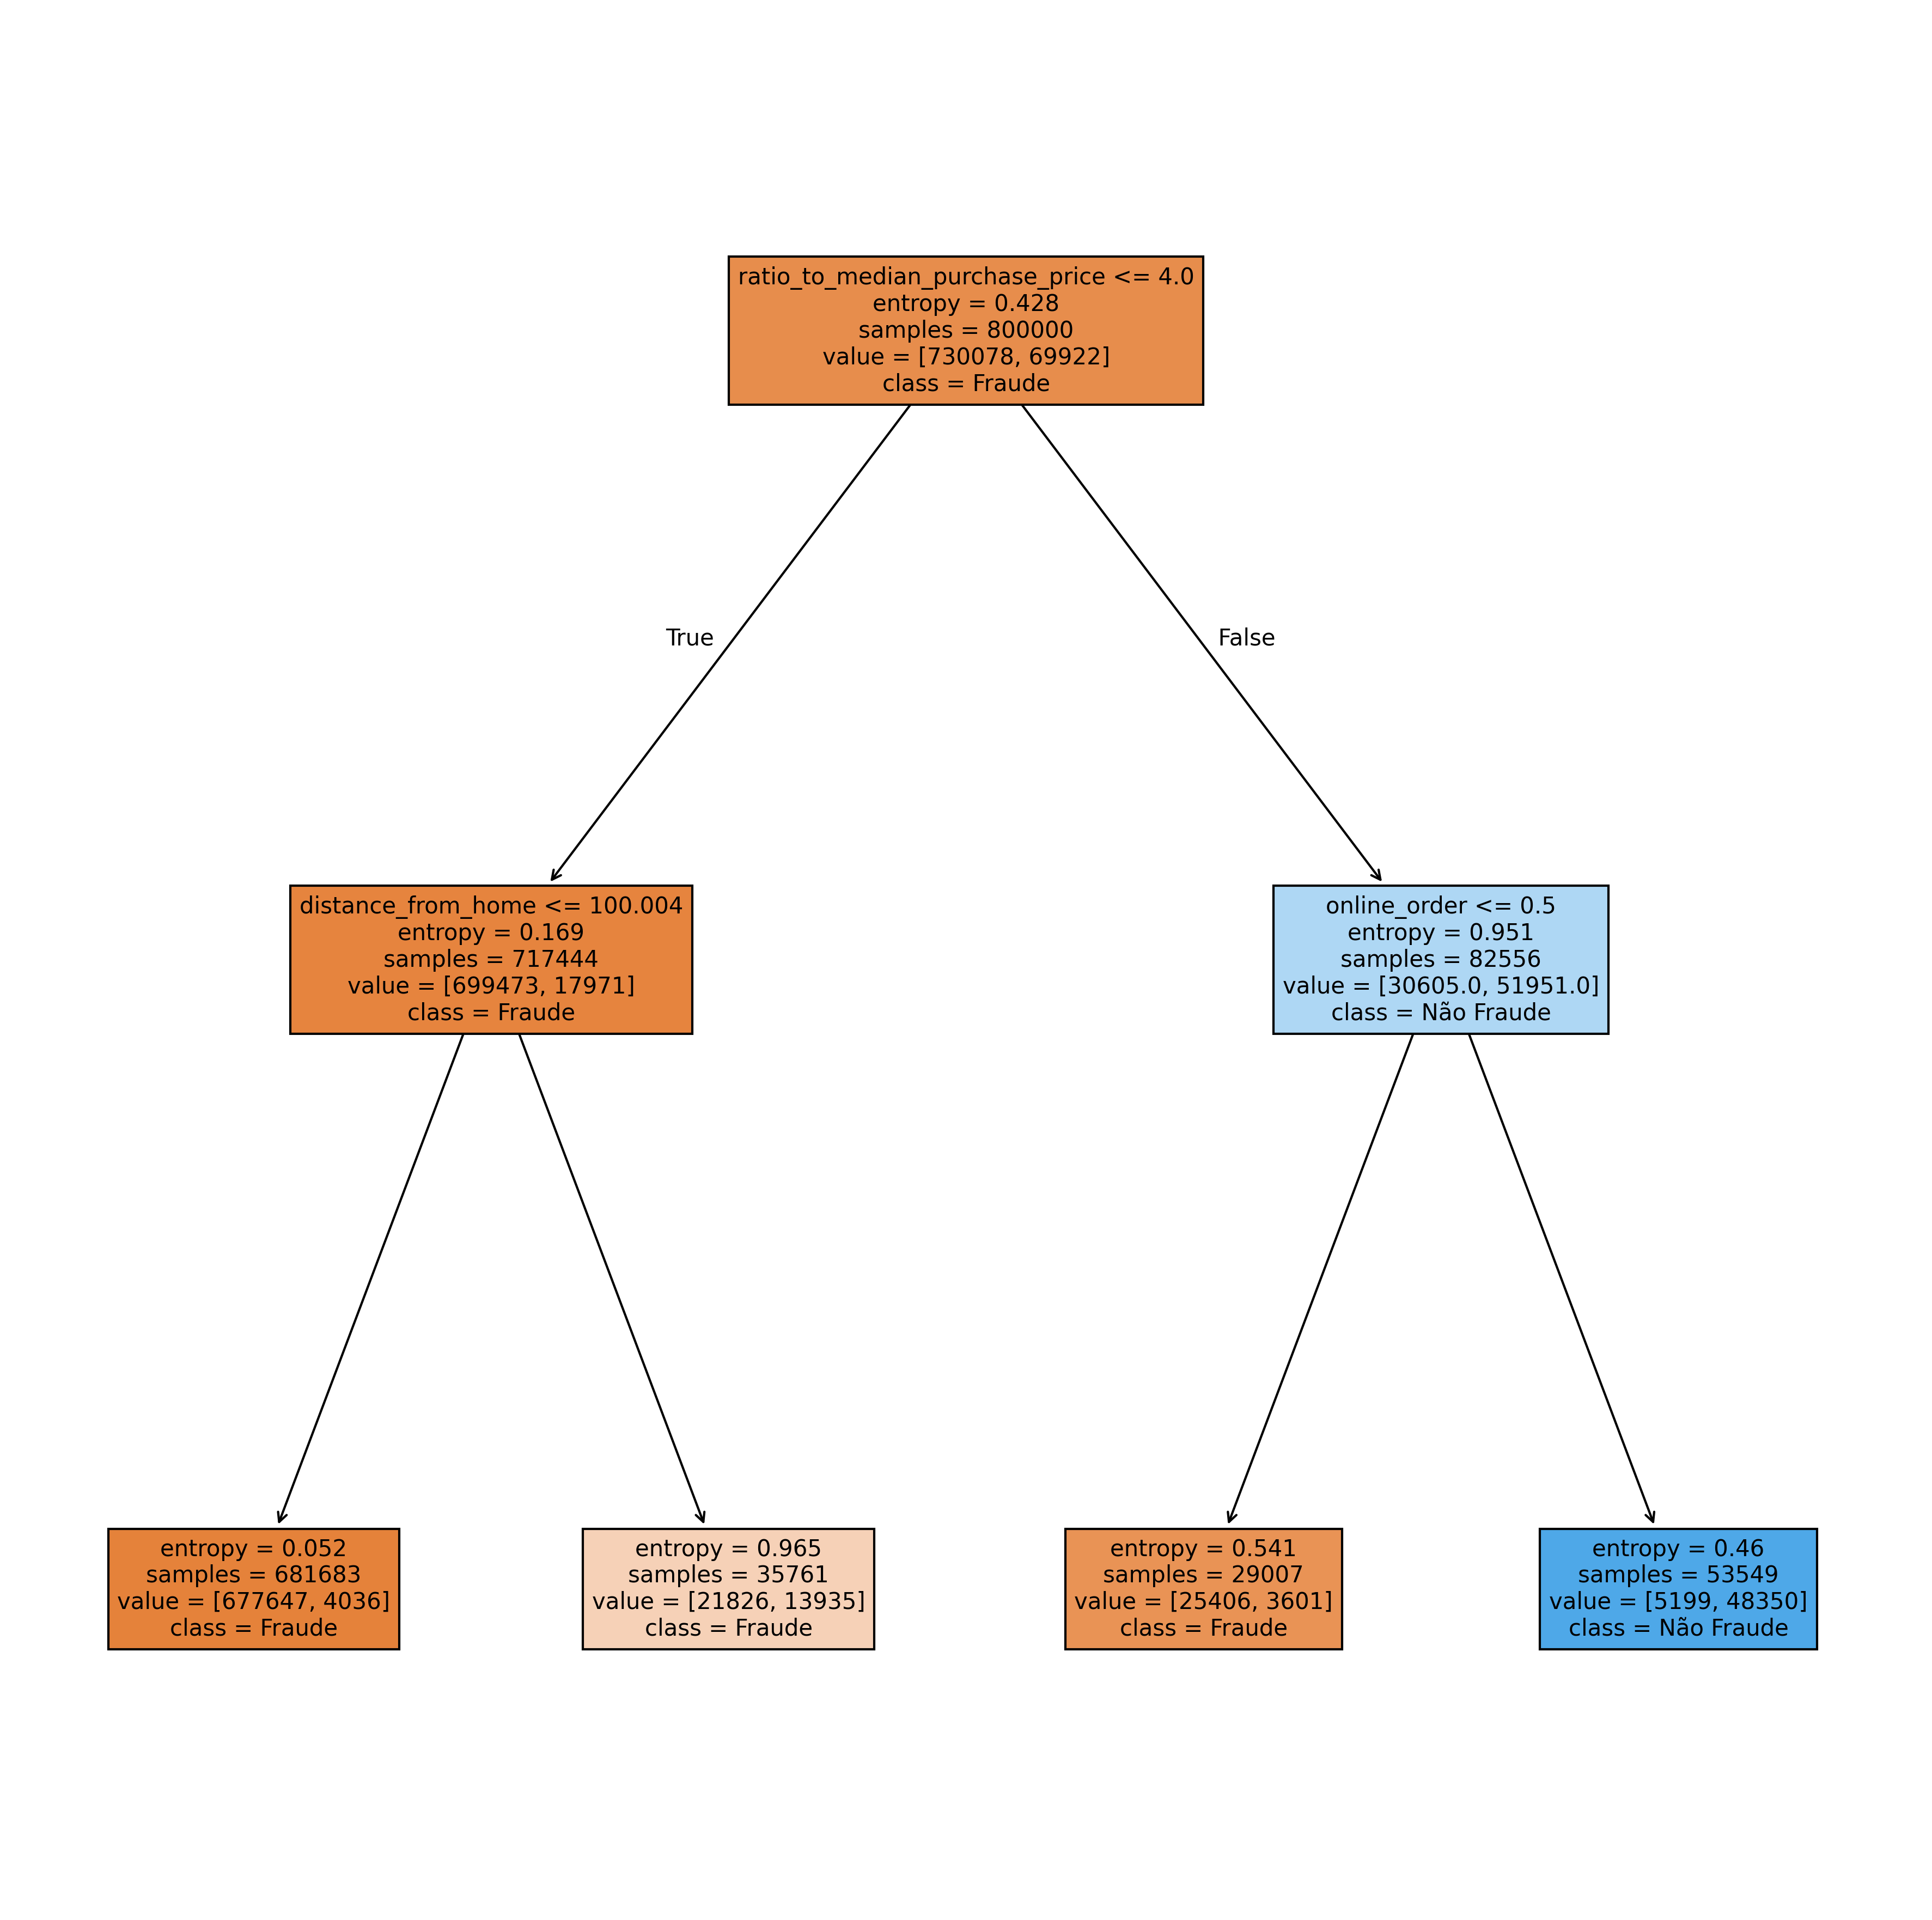

In [84]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15), dpi=300)

tree.plot_tree(dt,
               feature_names = label_names, 
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

In [85]:
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.96675


# RandomForest

In [86]:
rf = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=7) 

rf.fit(x_train, y_train) 



RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [87]:
estimator_rf = rf.estimators_

In [88]:
y_predito_random_forest = rf.predict(x_test) 

In [89]:
print(accuracy_score(y_test, y_predito_random_forest)) #relatório de validação das métrica de desempenho.

0.95339


In [90]:
print (rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.95321875
0.95339


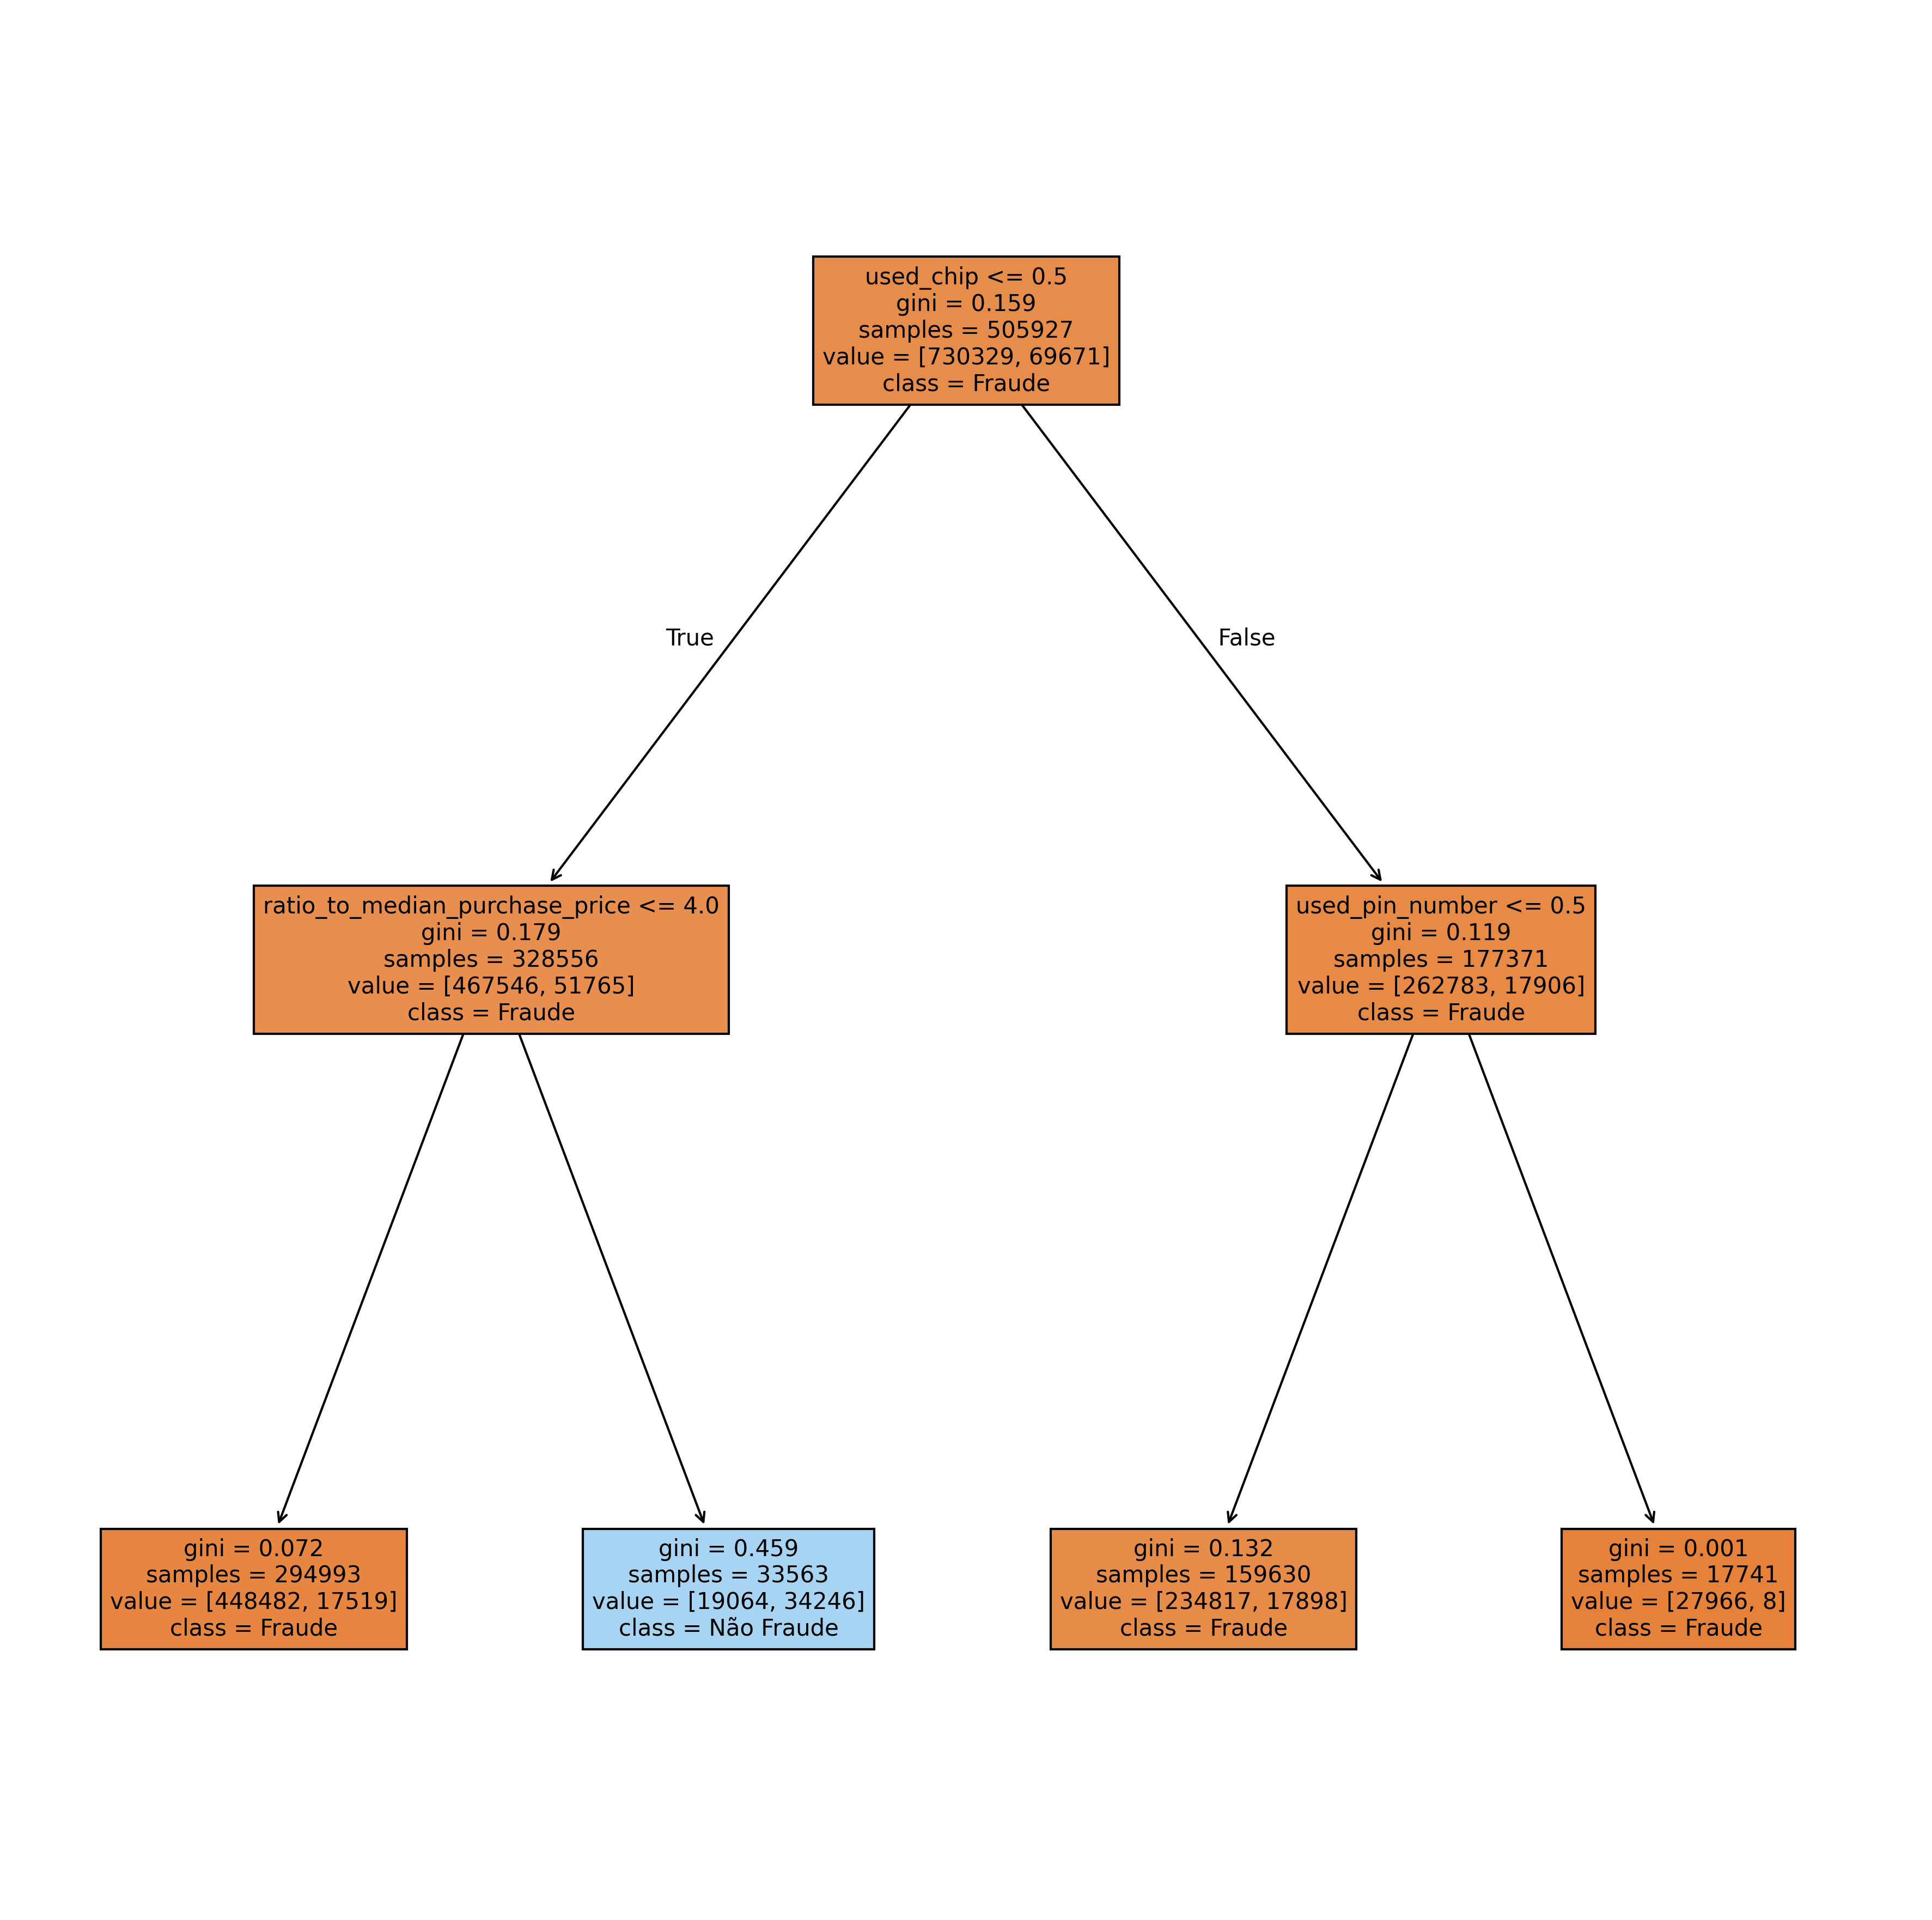

In [91]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15), dpi=300)

tree.plot_tree(rf.estimators_[1],
               feature_names = label_names, 
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

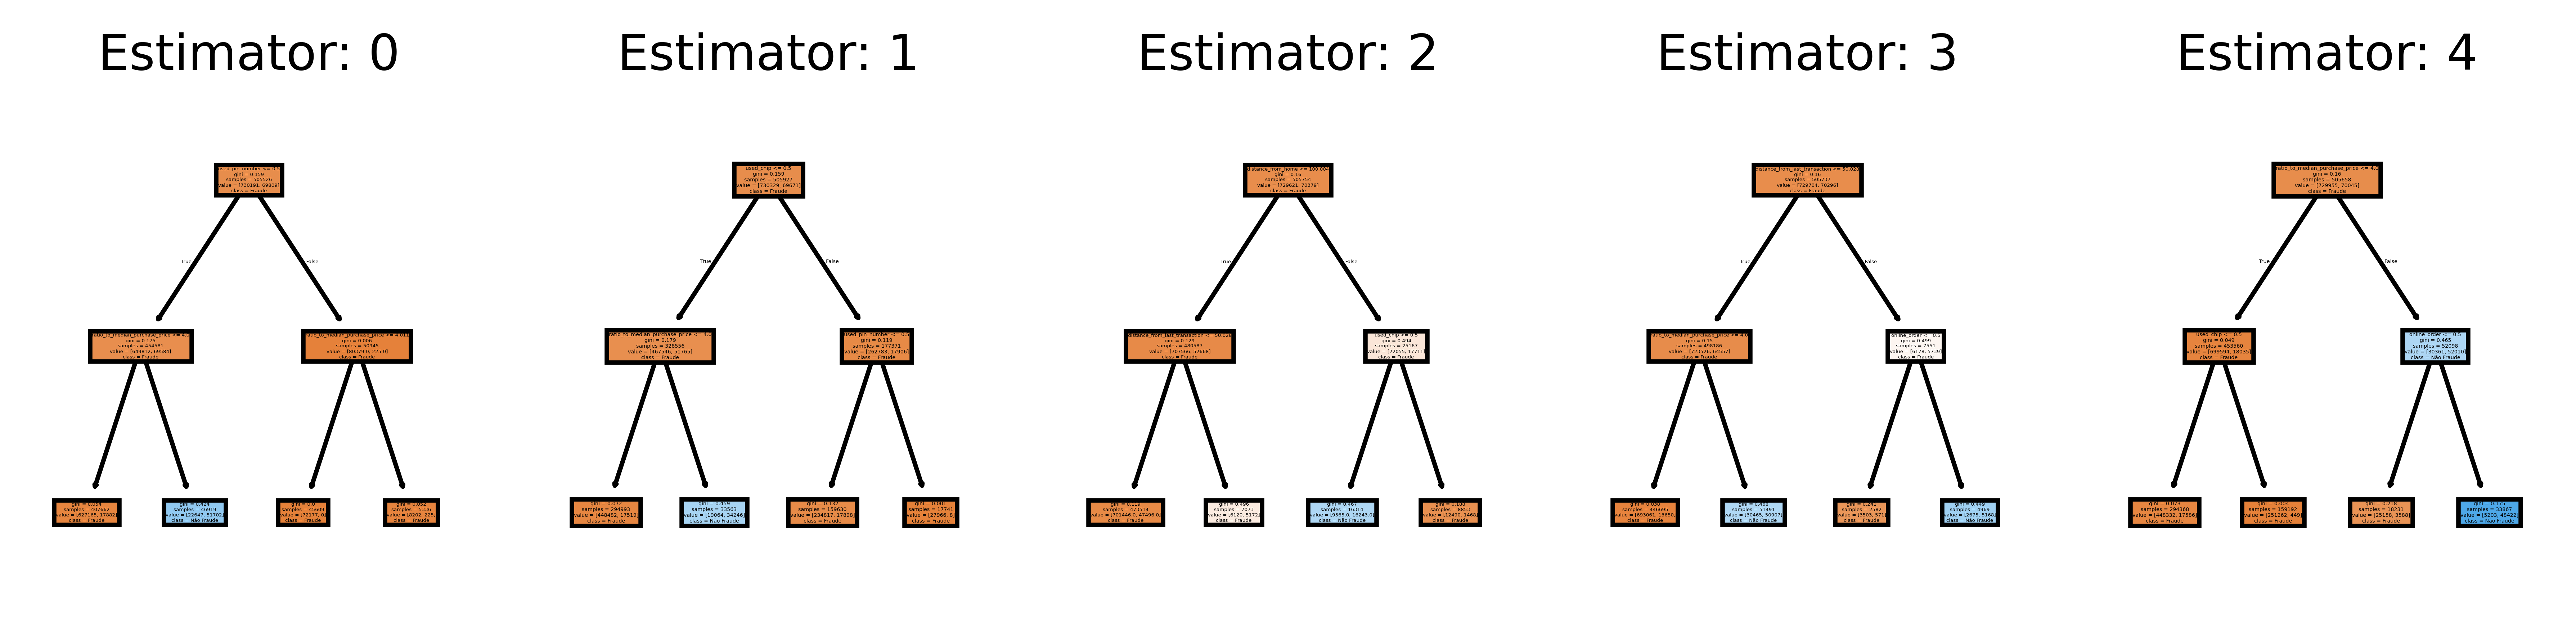

In [92]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,2), dpi=900)

for index in range(0,5):
    tree.plot_tree(rf.estimators_[index],
                feature_names = label_names, 
                class_names=class_names,
                filled = True,
                ax = axes[index])
    
    axes[index].set_title('Estimator: ' + str(index), fontsize=11)
                

fig.savefig('rf5.png')

In [93]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))


0.95321875
0.95339
